# **HOMEWORK 4**
---

**Goal:** Build a multilayer perceptron (MLP) model & for classifying SVHN dataset.

**Dataset:** SVHN, 32x32 RGB number images.        
http://ufldl.stanford.edu/housenumbers/

---

###**Instructions**             
**1)** **Preprocessing**  
> **1.1)** Load the dataset                 
> **1.2)** Normalize features                
  **1.3)** Visualize dataset

**2)** **Modelling**
> **2.1)** Try different fully hyperparameters (# of hidden layers, learning rate, # of epochs, # of neurons, add dropout, etc.)             
> **2.2)** Train with early stopping

**3)** **Report**                   
Share your results, which hyperparameters you used, train & test accuracy, etc. 
Write an at most 1/2-page summary of your approach to this problem at the end of your notebook; this should be like an executive summary. Include problem definition and preprocessing as well.


> **Topics to Discuss:**                                      
Explain you results.           
How did you choose the best hyperparameters?                         
What happened when the # of epochs are too large/small, why?                  
What happened when the learning rate is too large/small, why?              
What did you observe when you change the # of hidden layers?                
What did you observe when you change the # of neurons?   
What is the use of adding dropout?                     
What is the use of early stopping? 


---


**Note:** Don't forget to change Colab's runtime to GPU.







#1) Preprocessing
Load, normalize and visualize data


---





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from scipy.io import loadmat
import numpy as np
import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [4]:
# Load SVHN dataset
def load_data(path):
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('/content/drive/My Drive/train_32x32.mat')
X_test, y_test = load_data('/content/drive/My Drive/test_32x32.mat')


# Summarize dataset (count, shape, min/max value)

print("Train set shape:", X_train.shape, "\nTest set shape:", X_test.shape)
print("Min value:", X_train.min(), "\nMax value:", X_train.max())


Train set shape: (32, 32, 3, 73257) 
Test set shape: (32, 32, 3, 26032)
Min value: 0 
Max value: 255


In [5]:
#Change input shape
X_train = np.moveaxis(X_train, -1, 0)
X_test = np.moveaxis(X_test, -1, 0)
from keras.utils import to_categorical
#one-hot encode
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# Normalize dataset
X_train = X_train / 255.0
X_test = X_test / 255.0

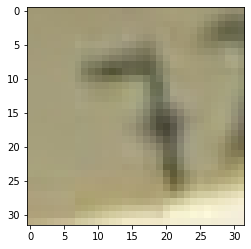

Label:  [7]


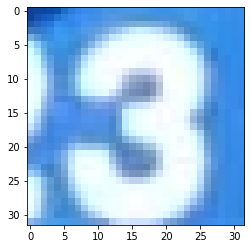

Label:  [3]


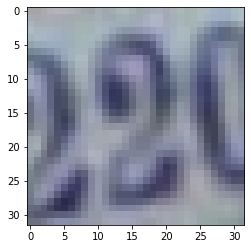

Label:  [2]


In [ ]:
# Visualize some samples
#9999th image:
plt.imshow(X_train[9999])
plt.show()
print('Label: ', y_train[9999])

#3rd image:
plt.imshow(X_train[3])
plt.show()
print('Label: ', y_train[3])

#2222nd image:
plt.imshow(X_train[2222])
plt.show()
print('Label: ', y_train[2222])

In [7]:
#splitting the set into train and validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

#2) Modelling
(Build, compile, fit, evaluate)


---



##2.1) Part 1

---



In [8]:
# Build the model

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, strides=2, activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'))
model.add(Flatten())
model.add(Dense(11, activation='softmax'))

In [9]:
# Compile & fit the model 
# Hint: You can assign batch sizes 128, 256
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=256, validation_data=(X_val, y_val))

229/229 [==============================] - 32s 13ms/step - loss: 2.1592 - accuracy: 0.2407 - val_loss: 1.3290 - val_accuracy: 0.6607


In [10]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy %.2f%%' % (test_acc*100))

814/814 [==============================] - 3s 4ms/step - loss: 1.3589 - accuracy: 0.6608
Test accuracy 66.08%


In [11]:
# Try different hyperparameters and observe the results

#epoch = 10
print("epoch: 10")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=256, validation_data=(X_val, y_val), epochs = 10)
print("------------------------------\n")


epoch: 10
Epoch 1/10
229/229 [==============================] - 3s 12ms/step - loss: 1.1754 - accuracy: 0.6796 - val_loss: 0.9058 - val_accuracy: 0.7600
Epoch 2/10
229/229 [==============================] - 2s 10ms/step - loss: 0.8351 - accuracy: 0.7755 - val_loss: 0.7657 - val_accuracy: 0.7869
Epoch 3/10
229/229 [==============================] - 2s 9ms/step - loss: 0.7164 - accuracy: 0.8080 - val_loss: 0.6882 - val_accuracy: 0.8106
Epoch 4/10
229/229 [==============================] - 2s 9ms/step - loss: 0.6629 - accuracy: 0.8220 - val_loss: 0.6599 - val_accuracy: 0.8285
Epoch 5/10
229/229 [==============================] - 2s 9ms/step - loss: 0.6230 - accuracy: 0.8310 - val_loss: 0.6344 - val_accuracy: 0.8292
Epoch 6/10
229/229 [==============================] - 2s 9ms/step - loss: 0.5992 - accuracy: 0.8381 - val_loss: 0.6288 - val_accuracy: 0.8253
Epoch 7/10
229/229 [==============================] - 2s 9ms/step - loss: 0.5884 - accuracy: 0.8413 - val_loss: 0.6135 - val_accuracy: 0

In [12]:
#epoch = 50
print("epoch :50")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=256, validation_data=(X_val, y_val), epochs = 50)


epoch :50
Epoch 1/50
229/229 [==============================] - 3s 11ms/step - loss: 0.5455 - accuracy: 0.8487 - val_loss: 0.6201 - val_accuracy: 0.8350
Epoch 2/50
229/229 [==============================] - 2s 9ms/step - loss: 0.5359 - accuracy: 0.8533 - val_loss: 0.6001 - val_accuracy: 0.8387
Epoch 3/50
229/229 [==============================] - 2s 9ms/step - loss: 0.5341 - accuracy: 0.8539 - val_loss: 0.6162 - val_accuracy: 0.8346
Epoch 4/50
229/229 [==============================] - 2s 9ms/step - loss: 0.5234 - accuracy: 0.8570 - val_loss: 0.6016 - val_accuracy: 0.8372
Epoch 5/50
229/229 [==============================] - 2s 9ms/step - loss: 0.5166 - accuracy: 0.8581 - val_loss: 0.5978 - val_accuracy: 0.8388
Epoch 6/50
229/229 [==============================] - 2s 9ms/step - loss: 0.5116 - accuracy: 0.8596 - val_loss: 0.5965 - val_accuracy: 0.8404
Epoch 7/50
229/229 [==============================] - 2s 9ms/step - loss: 0.5066 - accuracy: 0.8601 - val_loss: 0.6179 - val_accuracy: 0.

In [13]:
#learning rate = 0.1
print("learning rate: 0.1")
opt = keras.optimizers.Adam(lr=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=256, validation_data =(X_val, y_val))
print("------------------------------\n")

#learning rate = 0.00001
print("learning rate: 0.00001")
opt = keras.optimizers.Adam(lr=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=256, validation_data=(X_val, y_val))
print("------------------------------\n")

learning rate: 0.1
229/229 [==============================] - 3s 12ms/step - loss: 22.7666 - accuracy: 0.2018 - val_loss: 2.2362 - val_accuracy: 0.1942
------------------------------

learning rate: 0.00001
229/229 [==============================] - 3s 11ms/step - loss: 2.2422 - accuracy: 0.1877 - val_loss: 2.2361 - val_accuracy: 0.1942
------------------------------






---


**Dropout** : [Dropout](https://keras.io/api/layers/regularization_layers/dropout/) is a regularization approach. At each training stage, specified percent of individual nodes are dropped out of the network.

[Read](https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/) MLP Dropout Regularization for further information

![picture](https://drive.google.com/uc?id=12lv5VsPFLt6sKEZvgQRyQ7mHeW4l-Vq9)

In [22]:
#Try adding dropout to the architecture 
del model 

model = Sequential([
  Conv2D(filters=64, kernel_size=3, strides=1, padding = 'same', activation='relu', input_shape=(32,32,3)),
  Dropout(0.4),
  MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),
  Conv2D(filters=128, kernel_size=3, strides=1, padding = 'same', activation='relu', input_shape=(32,32,3)),
  Dropout(0.4),
  MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),
  Conv2D(filters=64, kernel_size=3, strides=2, padding = 'same', activation='relu', input_shape=(32,32,3)),
  Dropout(0.3),
  MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),
  Conv2D(filters=32, kernel_size=3, strides=2, padding = 'same', activation='relu', input_shape=(32,32,3)),
  Dropout(0.3),
  MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),
  Conv2D(filters=16, kernel_size=3, strides=1, padding = 'same', activation='relu'),
  Dropout(0.3),
  MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.3),
  Dense(11, activation='softmax')
])


model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=256, validation_data=(X_val, y_val))

229/229 [==============================] - 37s 159ms/step - loss: 2.3270 - accuracy: 0.1480 - val_loss: 2.3608 - val_accuracy: 0.1942


##2.2) Part 2


---



When training a model, model stops generalizing after a while and learns noices of the datapoints as well. One way to avoid this **overfitting** is to use **early stopping**. With early stopping, model performance is monitored on validation data in each epoch and stops updating weights when validation performance starts decreasing.

https://keras.io/api/callbacks/early_stopping/

![picture](https://drive.google.com/uc?id=1Rs8FkpVgifspzvlIfdTDYyBVjR01OgVj)

In [24]:
# Build & compile the model
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, strides=2, activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'))
model.add(Flatten())
model.add(Dense(11, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Aim is to stop when minimum validation loss is achieved

es = EarlyStopping(monitor='val_loss', patience=10, \
                    verbose=1, mode='min',restore_best_weights=True) # Training will stop when minimum validation loss is achieved

model.fit(X_train, y_train, batch_size=256 ,
                              epochs=100, validation_data=(X_val, y_val), # you can have large epoch size since it will stop when best validation loss is achieved
                              callbacks=[es], verbose=1)

Epoch 1/100
229/229 [==============================] - 3s 11ms/step - loss: 2.1186 - accuracy: 0.2684 - val_loss: 1.2890 - val_accuracy: 0.6448
Epoch 2/100
229/229 [==============================] - 2s 9ms/step - loss: 1.1421 - accuracy: 0.6956 - val_loss: 0.8703 - val_accuracy: 0.7579
Epoch 3/100
229/229 [==============================] - 2s 10ms/step - loss: 0.8338 - accuracy: 0.7744 - val_loss: 0.7422 - val_accuracy: 0.7925
Epoch 4/100
229/229 [==============================] - 2s 9ms/step - loss: 0.7090 - accuracy: 0.8066 - val_loss: 0.6871 - val_accuracy: 0.8062
Epoch 5/100
229/229 [==============================] - 2s 10ms/step - loss: 0.6597 - accuracy: 0.8197 - val_loss: 0.6571 - val_accuracy: 0.8262
Epoch 6/100
229/229 [==============================] - 2s 10ms/step - loss: 0.6209 - accuracy: 0.8322 - val_loss: 0.6350 - val_accuracy: 0.8239
Epoch 7/100
229/229 [==============================] - 2s 10ms/step - loss: 0.5987 - accuracy: 0.8361 - val_loss: 0.6123 - val_accuracy: 0

![picture](https://drive.google.com/uc?id=1Mp2W2VVQVmyuleSDNDKJLI6hxAtyG5gx)

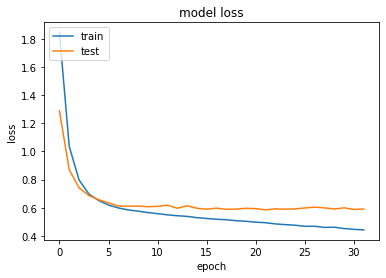

In [26]:
#Plot train & validation loss

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
#Evaluate on test data

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy %.2f%%' % (test_acc*100))

814/814 [==============================] - 3s 3ms/step - loss: 0.7071 - accuracy: 0.8195
Test accuracy 81.95%


#3) Report


---

Summary of models you try (learning rate, # of hidden layers, # of epochs, test accuracy, etc.) Write a short report & discuss the results of the models you trained

I tried learning rate and # of epochs hyperparameters as [0.1, 0.00001] and [10, 50] respectively. Tha first basic model has got the accuracy of 66.07% on validation data and 66.08% on test data. With # of epochs = 10, the validation accuracy became 84.02% at most, on the other hand with #of epochs = 50, it became 84.48% at most. I probably made a mistake on tuning learning rate hyperparameter. Dropout has stopped at the #of epochs = 32, however best validation loss exists before 32.